In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

In [6]:
def vaccinate(data, n_vaccines, n_priority):

    pos_x = []
    factor = n_vaccines/len(data)*100
    factors = np.arange(0, factor+1, factor/n_priority)
    priority = np.arange(0, n_priority, 1)
    result = "For {vac} vaccines, {pop} people and {n_t} priority levels:".format(vac = n_vaccines, n_t = n_priority, pop=len(data))

    for n in factors[1:]:
        current = np.percentile(data, 100-n)
        pos_x.append(current)

    print(result)

    ##plotting the data
    plt.hist(data, histtype='step', bins=100)

    for q in pos_x:
        plt.axvline(x=q, color='r')
    plt.show()
    factors = 100 - factors
    factors = factors[::-1]

    for b, i in zip(factors, range(0, len(factors))):
        if i!=len(factors)-1:
            init_lim = np.percentile(data, b)
            last_lim = np.percentile(data, factors[i+1])
            msg = "Bracket {pr}, for ages {init} to {lim}".format(pr=len(factors)-1-i, init=init_lim, lim=last_lim)
            print(msg)
    print("________________________\n")
    return data[data<np.percentile(data, factors[0])]

For 1000 vaccines, 10000 people and 3 priority levels:


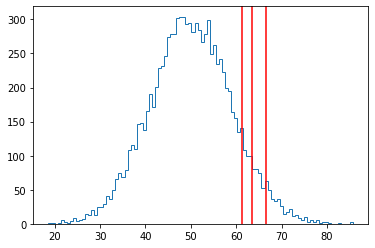

Bracket 3, for ages 61.36194658205766 to 63.510316984202824
Bracket 2, for ages 63.510316984202824 to 66.65565272110203
Bracket 1, for ages 66.65565272110203 to 85.6785984371173
________________________

For 1000 vaccines, 9000 people and 3 priority levels:


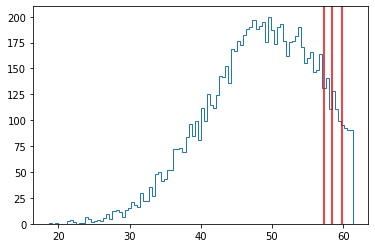

Bracket 3, for ages 57.35895968410168 to 58.493226343972935
Bracket 2, for ages 58.493226343972935 to 59.788228285544804
Bracket 1, for ages 59.788228285544804 to 61.361580641433626
________________________

For 1000 vaccines, 8000 people and 3 priority levels:


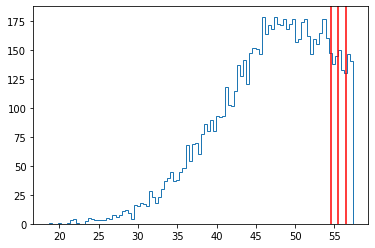

Bracket 3, for ages 54.60091182583232 to 55.48594230424362
Bracket 2, for ages 55.48594230424362 to 56.42911427600953
Bracket 1, for ages 56.42911427600953 to 57.358782794756394
________________________

For 1000 vaccines, 7000 people and 3 priority levels:


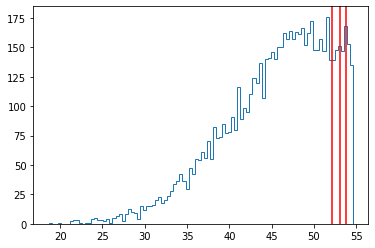

Bracket 3, for ages 52.18166714266963 to 53.02190580218865
Bracket 2, for ages 53.02190580218865 to 53.79241363306579
Bracket 1, for ages 53.79241363306579 to 54.60065867663999
________________________

For 1000 vaccines, 6000 people and 3 priority levels:


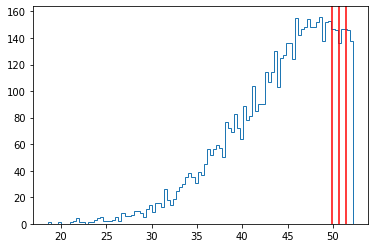

Bracket 3, for ages 49.847365903446715 to 50.61992577642971
Bracket 2, for ages 50.61992577642971 to 51.398528539250755
Bracket 1, for ages 51.398528539250755 to 52.18117191942632
________________________

Vaccinated people 5000


In [10]:
data = 9 * np.random.randn(10000) + 50
vaccines = 1000
priority_lvls = 3
#_ = vaccinate(data, vaccines, priority_lvls)
vacc_people = 0
while(len(data)>5000):
    ilen_data = len(data)
    data = vaccinate(data, vaccines, priority_lvls)
    vacc_people = vacc_people + (ilen_data-len(data))
    
print("Vaccinated people", vacc_people)
#print(len(f))

In [3]:
# age distribution
age_dist = random.normal(loc=50, scale=9, size=10000)
print(age_dist)

[38.89049017 49.15667362 35.12619411 ... 65.13409032 50.03110742
 40.52648462]


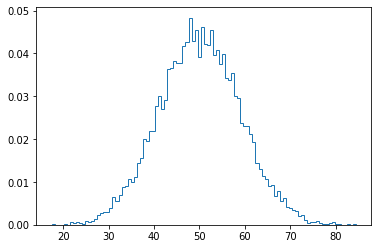

In [4]:
plt.hist(data, density=True, bins=100, histtype='step')
#plt.legend()
plt.show()

In [5]:
data[:5]

array([48.49016061, 53.05447001, 44.91934163, 49.114392  , 55.77404394])

### y axis
<p>Each ailment will have an associated, arbitrary "score" </p>
<p>The user's score will be the sum of all the individual ailments scores he/she has </p>
<p>A high score will help the user get a higher priority</p>

### Ailments scores
<p>diabetes : 0.15</p>
<p>obesity : 0.12</p>
<p>overweight : 0.08</p>
<p>hypertension/high blood pressure : 0.18</p>
<p>heart conditions : 0.20</p>
<p>pregnancy : 0.10</p>


In [33]:
import random
professions = {'doctor': 0.4, '1st_responder': 0.6, 'nurse': 0.5, 'h_employee':0.2}
prof_list = list(professions.keys())


for i in range(0, 5):
    data = random.randint(0,3)
    key = prof_list[data]
    
    print(professions[key])


#print(data)

0.4
0.4
0.4
0.6
0.2


In [6]:
ailments = {'diabetes':0.15, 'obesity': 0.12, 'overweight': 0.06, 
            'hypertension': 0.18, 'doctor': 0.2, 'pregnancy':0.10}
ails = list(ailments.keys())

In [7]:
import random
## Assumption 1, each ailment has the same probability of occuring in a user 
## Assumption 2, after a certain age the user has higher probability of acquiring any of these diseases 
data_2 = 12 * np.random.randn(100) + 50
data_y = []
for x in data_2:

    prob_dis = 0.20;
    if x>28.0:
        prob_dis=prob_dis+0.15 
    else :
        prob_dis=prob_dis-0.05  
    
    # Get number of diseases the user has
    num_diseases = np.random.binomial(6, prob_dis)
    
    # Get the distinct diseases the user has
    d = random.sample(range(0,6), num_diseases)
    diseases = [ails[n] for n in d]
    
    # Calculate the user score
    score = np.sum([ailments[n] for n in diseases])
    data_y.append(score)
    #print("age:", np.floor(x), " score:", score)
    #print("diseases:", diseases)
    
#[random.binomial(6, 0.3)]

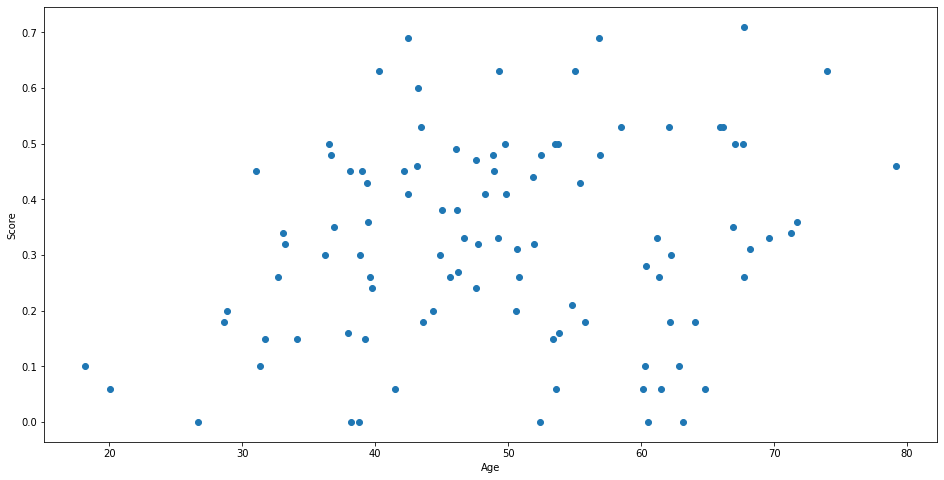

In [8]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(data_2, data_y)

ax.set_xlabel("Age")
ax.set_ylabel("Score")

plt.show()

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame({'age':data_2, 'score':data_y})
df.head()

age  score
0  66.890406   0.35
1  67.682910   0.50
2  60.260155   0.10
3  47.755232   0.32
4  31.339640   0.10

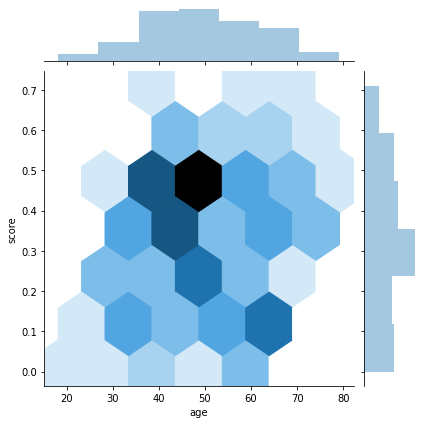

In [11]:
sns.jointplot(data=df, x='age', y='score', kind='hex')